In [13]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from shutil import copyfile


In [7]:
####  Etract dataset 

file_link = 'kagglecatsanddogs_3367a.zip'
read_ref=zipfile.ZipFile(file_link, 'r')
read_ref.extractall()
read_ref.close()

In [2]:
try:
    os.mkdir('cat_and_dogs')
    os.mkdir('cat_and_dogs/training')
    os.mkdir('cat_and_dogs/testing')
    os.mkdir('cat_and_dogs/training/cats')
    os.mkdir('cat_and_dogs/training/dogs')
    os.mkdir('cat_and_dogs/testing/cats')
    os.mkdir('cat_and_dogs/testing/dogs')
except OSError:
    pass
    

In [5]:
def split_data(source, training, testing, split_size):
    
    files = []
    
    for filename in os.listdir(source):
        file = source + filename 
        if os.path.getsize(file)>0: ## will return the size in bytes of the file in the path argument.
            files.append(filename)
        else:
            print( filename + " is empty size and ignoring")
            
    ### create training and testing data 
    
    training_lenght = int(len(files)*split_size)
    testing_lenght = int(len(files) - training_lenght)
    
    ### shuffled data set 
    shuffled_set = random.sample(files, len(files))
    
    training_set = shuffled_set[0:training_lenght ]
    testing_set = shuffled_set [ -testing_lenght :]
    
    for filename in training_set: 
        this_file = source + filename 
        destination = training + filename 
        copyfile(this_file, destination )
        
    for filename in testing_set: 
        this_file = source + filename
        destination = testing + filename
        copyfile(this_file, destination)
    
    
    

In [6]:
##### Create all data set 
CAT_SOURCE_DIR = "PetImages/Cat/"
TRAINING_CATS_DIR = "cat_and_dogs/training/cats/"
TESTING_CATS_DIR = "cat_and_dogs/testing/cats/"
DOG_SOURCE_DIR = "PetImages/Dog/"
TRAINING_DOGS_DIR = "cat_and_dogs/training/dogs/"
TESTING_DOGS_DIR = "cat_and_dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

666.jpg is empty size and ignoring
11702.jpg is empty size and ignoring


In [7]:
print(len(os.listdir('cat_and_dogs/training/cats/')))
print(len(os.listdir('cat_and_dogs/training/dogs/')))
print(len(os.listdir('cat_and_dogs/testing/cats/')))
print(len(os.listdir('cat_and_dogs/testing/dogs/')))

11250
11250
1250
1250


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
##### image data generator 



training_dir = "cat_and_dogs/training/"

train_datagen= ImageDataGenerator(rescale=1.0/255.)


train_data = train_datagen.flow_from_directory(training_dir, 
                          batch_size =100, 
                          class_mode = 'binary',
                          target_size = (150,150))

valid_dir = "cat_and_dogs/testing/"

valid_datagen = ImageDataGenerator(1/255)

valid_data = valid_datagen.flow_from_directory( valid_dir,
                                                        batch_size = 100,
                                                        class_mode = 'binary',
                                                        target_size = (150,150))



Found 22499 images belonging to 2 classes.
Found 2499 images belonging to 2 classes.


In [20]:
history = model.fit_generator(train_data,
                             validation_data =valid_data, 
                             steps_per_epoch =100,
                             epochs =15, 
                             validation_steps = 50, 
                             verbose = 2)

Epoch 1/15


C:\Users\hndzondzi-gourout\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\hndzondzi-gourout\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\hndzondzi-gourout\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\hndzondzi-gourout\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size,

100/100 - 284s - loss: 0.4715 - accuracy: 0.7722 - val_loss: 4.2266 - val_accuracy: 0.7155
Epoch 2/15


C:\Users\hndzondzi-gourout\AppData\Local\Continuum\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


100/100 - 310s - loss: 0.4627 - accuracy: 0.7826 - val_loss: 4.9157 - val_accuracy: 0.6743
Epoch 3/15


C:\Users\hndzondzi-gourout\AppData\Local\Continuum\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


100/100 - 308s - loss: 0.4055 - accuracy: 0.8146 - val_loss: 5.0079 - val_accuracy: 0.6687
Epoch 4/15


C:\Users\hndzondzi-gourout\AppData\Local\Continuum\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


100/100 - 319s - loss: 0.4037 - accuracy: 0.8177 - val_loss: 4.1623 - val_accuracy: 0.7215
Epoch 5/15


C:\Users\hndzondzi-gourout\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\hndzondzi-gourout\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\hndzondzi-gourout\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\hndzondzi-gourout\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size,

100/100 - 317s - loss: 0.3601 - accuracy: 0.8446 - val_loss: 4.8607 - val_accuracy: 0.6799
Epoch 6/15


C:\Users\hndzondzi-gourout\AppData\Local\Continuum\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


100/100 - 292s - loss: 0.3391 - accuracy: 0.8494 - val_loss: 4.7600 - val_accuracy: 0.6839
Epoch 7/15


C:\Users\hndzondzi-gourout\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\hndzondzi-gourout\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\hndzondzi-gourout\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\hndzondzi-gourout\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size,

100/100 - 277s - loss: 0.3146 - accuracy: 0.8634 - val_loss: 3.4103 - val_accuracy: 0.7727
Epoch 8/15


C:\Users\hndzondzi-gourout\AppData\Local\Continuum\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


100/100 - 290s - loss: 0.2711 - accuracy: 0.8831 - val_loss: 4.3922 - val_accuracy: 0.7087
Epoch 9/15


C:\Users\hndzondzi-gourout\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\hndzondzi-gourout\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\hndzondzi-gourout\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\hndzondzi-gourout\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size,

100/100 - 317s - loss: 0.2738 - accuracy: 0.8835 - val_loss: 5.3866 - val_accuracy: 0.6463
Epoch 10/15


C:\Users\hndzondzi-gourout\AppData\Local\Continuum\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


100/100 - 311s - loss: 0.2063 - accuracy: 0.9164 - val_loss: 3.6579 - val_accuracy: 0.7583
Epoch 11/15


C:\Users\hndzondzi-gourout\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\hndzondzi-gourout\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\hndzondzi-gourout\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\hndzondzi-gourout\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size,

100/100 - 267s - loss: 0.2042 - accuracy: 0.9171 - val_loss: 3.3238 - val_accuracy: 0.7799
Epoch 12/15


C:\Users\hndzondzi-gourout\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\hndzondzi-gourout\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\hndzondzi-gourout\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\hndzondzi-gourout\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size,

100/100 - 252s - loss: 0.1495 - accuracy: 0.9426 - val_loss: 3.7716 - val_accuracy: 0.7527
Epoch 13/15


C:\Users\hndzondzi-gourout\AppData\Local\Continuum\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


100/100 - 250s - loss: 0.1381 - accuracy: 0.9469 - val_loss: 4.3985 - val_accuracy: 0.7119
Epoch 14/15


C:\Users\hndzondzi-gourout\AppData\Local\Continuum\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


100/100 - 250s - loss: 0.1085 - accuracy: 0.9597 - val_loss: 4.2745 - val_accuracy: 0.7203
Epoch 15/15


C:\Users\hndzondzi-gourout\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\hndzondzi-gourout\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\hndzondzi-gourout\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\hndzondzi-gourout\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size,

100/100 - 250s - loss: 0.0857 - accuracy: 0.9683 - val_loss: 3.3753 - val_accuracy: 0.7767


<Figure size 432x288 with 0 Axes>

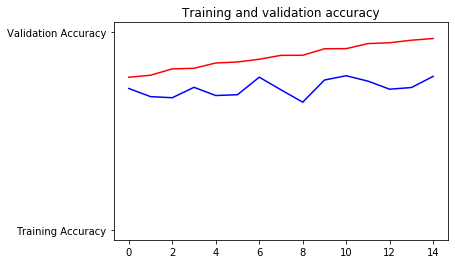

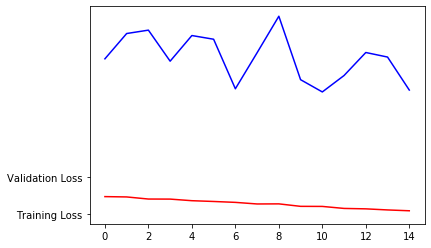

<Figure size 432x288 with 0 Axes>

In [23]:
##### retrieve models informations 

%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(accuracy)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, accuracy, 'r', "Training Accuracy")
plt.plot(epochs, val_accuracy, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)